<a href="https://colab.research.google.com/github/paolokhayat/Interview-Questions/blob/master/AUB_AI_club_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas: To see your data in a nice way

---



Go to https://gist.github.com/netj/8836201#file-iris-csv and get iris.csv

In [0]:
import pandas as pd

df=pd.read_csv('iris.csv')
df.head()  #.head() automatically shows the first 5 rows of our dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [0]:
df.iloc[0]  #this means I want to get the zeroth row of all columns

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [0]:
df.iloc[1,2] #this means I want the value at row number 1 and column 2, in our case column number 2 is petal.length

1.4

In [0]:
df.iloc[:,0].head() #I want all rows of column zero, colmun zero being sepal.length
                    #adding .head() makes me want to see the first five rows only.

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal.length, dtype: float64

In [0]:
df.iloc[1:4,0:2] #note that 1:4 returns up to the integer before 4, sasme for: 0:2 it returns the integer up to 1 included

,sepal.length,sepal.width
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


note: 
**iloc stands for integer location**

In [0]:
#df.drop('column name') drops a column from the data frame


##Numpy: a great matrix & vectorization tool

In [0]:
import numpy as np

#creating a numpy 1D array or vector
a=np.array([1,2,3])
print(a)

[1 2 3]


In [0]:
#creating a numpy matrix or 2D array
b=np.array([(1,2,3),(3,4,5)])
print(b)

[[1 2 3]
 [3 4 5]]


In [0]:
b.shape #I want to see the size of my numpy array, it returns (number of rows, number of columns)

(2, 3)

In [0]:
b.reshape(-1,1) 

array([[1],
       [2],
       [3],
       [3],
       [4],
       [5]])

In [0]:
#saving your array to a comma separated value file (csv), important for when you want to save your predictions
np.savetxt('newarray.txt',b,delimiter=',')

the format for np.savetxt is; np.savetxt('filename.csv',your numpy array name, delimiter=',')

##Matplotlib: to plot graphs and stuff; best data visualization tool

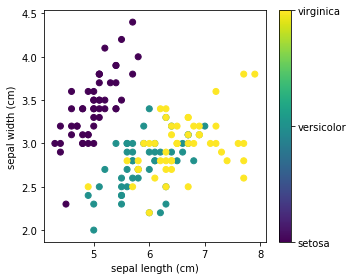

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

##Sklearn: best tool for basic machine learning

machine learning is all math, if we have strings (i.e. text) our machine learning algorithms cannot work.

Solution: Encoding, basically giving a number to every string.



In [0]:
#let's review our data first
df.head() #we have 3 types of flowers, Setosa, Versicolor and Virginica

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Based on Sepal length, Sepal Width, petal lengthand petal width, we want to predict what the variety of flower will be. This is a ***supervised*** learning problem

In [0]:
#first we preprocess our data:
y=[]
for i in df['variety']:
  if i=='Setosa':
    y.append(0)
  elif i=='Versicolor':
    y.append(1)
  else: 
    y.append(2)
#I assigned 0 to Setosa, 1 to Versicolor and 2 to Virginica

In [0]:
y #y is now an array containing 0s,1s and 2s corresponding to each flower type

In [0]:
#because sklearn does not support normal python arrays and only numpy arrays, we change the type of y to a numpy array
y = np.array(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
#Now that our data consists of only numbers, we can start making predictions using sklearn
from sklearn.neighbors import KNeighborsClassifier

mymodel=KNeighborsClassifier(n_neighbors=5) #initialize with five neighbors

#let's take a look at the data we are going to feed to the model for it to train.
X_train=df.drop('variety',axis=1).values
y_train=y.reshape(-1,1)                           #y is defined above as a numpy array

#We feed the training data into our model:

mymodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

When we see this (above) it meansthat our model is trained on the specified data, now time to make predictions!!

In [0]:
test_on=np.array([5,1.2,2,0.2]).reshape(1,-1)
mymodel.predict(test_on)

array([1])

In [0]:
test_on_2=np.array([4,1,2,0.2]).reshape(1,-1)
mymodel.predict(test_on_2)

array([0])

Tada! your first prediction